<h1>Monte Carlo simulation</h1>

**Bài 1**

<b>Đề bài: Mô phỏng Lấy mẫu từ Phân phối Chuẩn (Normal Distribution)</b> </br>
Hãy mô phỏng quá trình lấy mẫu từ một phân phối chuẩn hai chiều (bivariate normal distribution) có hàm mật độ xác suất (PDF) được định nghĩa bởi:

$$
f(x_1,x_2)=\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}exp(-\frac{1}{2(1-\rho^2)}[\frac{(x_1-\mu_1)^2}{\sigma^2}-\frac{2\rho(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2}+\frac{(x_2-\mu_2)^2}{\sigma^2}]) , -\infty < x1,x2 < \infty
$$

trong đó:
* $\mu_1,\mu_2$ là giá trị kỳ vọng (mean) của $x_1$ và $x_2$ tương ứng
* $\sigma_1,\sigma_2$ là độ lệch chuẩn (standard deviation) của $x_1$ và $x_2$ tương ứng
* $\rho$ là hệ số tương quan giữa $x_1$ và $x_2$ ($-1\le \rho \le 1$)

Hãy mô phỏng quá trình lấy mẫu N điểm từ phân phối trên, sử dụng thuật toán Metropolis-Hastings. Hiển thị kết quả bằng biểu đồ scatter.



🔑 Note:\
**input**: $X_0$, cỡ mẫu N, hàm mật độ xác suất mục tiêu $f(x)$, hàm đề xuất $q(x,y)$ \
**output**: $X_1,...,X_n$ (phụ thuộc) được phân phối xấp xỉ theo $f(x)$ \
**Các thông số cần thiết**: \
$N=10^4$ \
$\mu_1,\mu_2=0$ \
$\sigma_1=1,\sigma_2=2$ \
$\rho=0.5$

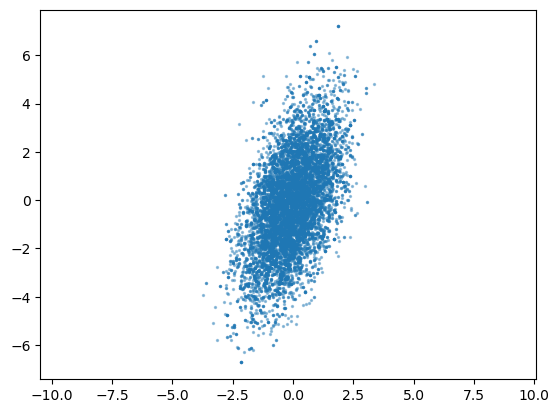

In [1]:
# Cài đặt thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

# Khởi tạo các thống số cần thiết
N = 10000
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 2
rho = 0.5

# Hàm mật độ xác suất
def f(x1, x2):
    factor = 1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))
    exponent = -1 / (2 * (1 - rho**2)) * (
        ((x1 - mu1)**2) / (sigma1**2) -
        2 * rho * (x1 - mu1) * (x2 - mu2) / (sigma1 * sigma2) +
        ((x2 - mu2)**2) / (sigma2**2)
    )
    return factor * np.exp(exponent)

# Lấy mẫu bằng Metropolis-Hastings
xx = np.zeros((N, 2))
x = np.zeros((1, 2)) # X_0

for i in range(1, N):
    y = x + randn(1, 2) # q(x,y)
    alpha = np.amin((f(y[0][0], y[0][1]) / f(x[0][0], x[0][1]), 1))
    r = rand() < alpha
    x = r * y + (1 - r) * x
    xx[i, :] = x

# Hiển thị kết quả bằng biểu đồ scatter
plt.scatter(xx[:, 0], xx[:, 1], alpha=0.4, s=2)
plt.axis('equal')
plt.show()

**Bài 2**

Xét tích phân sau:
$$\int_{0}^{1} e^{-x^2} \, dx$$
Với $\alpha$ = 95%, Ước tính giá trị tích phân và tính khoảng tin cậy

In [2]:
# Cài đặt thư viện cần thiết
import numpy as np
# Khởi tạo các thông số cần thiết
N = 1000
z = 1.96
#Tạo ra N phần tử x bất kì trong khoảng (0,1)
x = np.random.random(N)
#Tính N giá trị của y(x) tương ứng với N giá trị của x
y = lambda x: np.exp(-x**2)
#Tính trung bình giá trị của Y
mY = np.mean(y(x))
#Tính phương sai của Y
sY = np.sqrt(np.var(y(x),ddof=0))
#Tính sai số
e = sY/np.sqrt(N)
# In ra
print('Estimate = {:3.3f}, CI = ({:3.3f} ,{:3.3f})'.format(
mY , mY*(1-z*e), mY *(1+z*e)))

Estimate = 0.755, CI = (0.746 ,0.765)


**Bài 3**

**Thuật toán**\
Khởi tạo $v_0$, đặt $n^{elite}\leftarrow \lceil \varrho N\rceil$ và $t\leftarrow 0$\
**while** điều kiện dừng chưa hỏa

- $t \leftarrow t + 1$
- Mô phỏng các mẫu $X_1,...,X_N$ từ hàm mật độ $f(\cdot|v_{t-1}).$
- Đánh giá kết quả biểu diễn $S(X_1),...,S(X_N)$ và sắp xếp chúng theo thứ tự tăng dần: $S_{(1)},...,S_{(N)}.$
- Gọi $\gamma_t$ là mẫu $\varrho$-quantile (phân vị) của một giá trị hàm S:
    
    $$
    \gamma_t \leftarrow S_{(N^{elite})}
    $$
    
- Xác định tập elite sample $\mathcal{E}=\{X_i:S(X_i)\le \gamma_t\}$
- Đặt $v_t^{'}$ là MLE của elite samples:
    
    $$
    v_t^{'} \leftarrow argmax_v \sum_{X \in \mathcal{E}_t} lnf(X|V)
    $$
    
- Cập nhật lại tham số mẫu:
    
    $$
    v_t \leftarrow \alpha v_t^{'} + (1-\alpha)v_{t-1}
    $$
    

**return** $\gamma_t, v_t$


🔑 Note:\
**input**: Hàm $S$, khởi tạo tham số lấy mẫu ban đầu $v_0$, cỡ mẫu $N$, tham số độ hiếm $\varrho$, tham số làm mịn $\alpha$. \
**output**: Tối thiểu gần đúng của hàm $S$ và tham số lấy mẫu tối ưu $v$. \
**Các thông số cần thiết**: \
$N = 100$ \
$N^{elite} = 10$ \
$\mu = 0$ \
$\sigma = 3$ \
$\epsilon = 10^{-5}$
$$S(x) =
\begin{cases}
-e^{-x^2/100} \sin(13x-x^4)^{5} \sin(1-3x^2)^2, & \text{if } -2 \le x \le 2, \\
\infty, & \text{otherwise}.
\end{cases}$$


In [3]:
# Khai báo thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
# Khởi tạo hàm S(x)
def wiggly(x):
    y = -np.exp(x**2 / 100) * np.sin(13*x - x**4) ** 5*np.sin(1 - 3*(x**2))**2
    ind = np.vstack((np.argwhere(x<-2), np.argwhere(x>2)))
    y[ind] = float('inf')
    return y
# Đặt độ chính xác chữ số thập phân thứ 3
np.set_printoptions(precision=3)
# Khai báo các biến
mu, sigma = 0, 3
N, Nel = 100, 10
eps = 10**-5
S = wiggly
# Bắt đầu vòng lặp với điều kiện dừng là khi sigma < eps:
while sigma > eps:
    # Tạo mẫu ngẫu nhiên, cỡ mẫu N theo phân phối chuẩn, chia tỷ lệ theo
    # độ lệch chuẩn sigma và có giá trị trung bình mu:
    X = np.random.randn(N, 1) * sigma + np.array(np.ones((N, 1))) * mu
    # Chuyển đổi data gốc X và S(X) thành ma trận Sx:
    Sx = np.hstack((X, S(X)))
    # Sắp xếp data Sx dựa trên các giá trị được chuyển đổi trong cột 2
    # và chọn các hàng Nel trên cùng làm elite sample:
    sortSx = Sx[Sx[:, 1].argsort(), :]
    Elite = sortSx[0:Nel, :-1]
    # Cập nhật lị giá trị trung bình mu và độ lệch chuẩn sigma theo elite sample:
    mu = np.mean(Elite, axis=0)
    sigma = np.std(Elite, axis=0)
    # In các giá trị đã cập nhật:
    print('S(mu)= {}, mu: {}, sigma: {}\n'.format(S(mu), mu, sigma))

S(mu)= [8.451e-07], mu: [0.48], sigma: [0.872]

S(mu)= [0.828], mu: [0.923], sigma: [0.665]

S(mu)= [-0.764], mu: [1.316], sigma: [0.41]

S(mu)= [-0.876], mu: [1.4], sigma: [0.108]

S(mu)= [-0.958], mu: [1.366], sigma: [0.008]

S(mu)= [-0.958], mu: [1.366], sigma: [0.001]

S(mu)= [-0.958], mu: [1.366], sigma: [3.995e-05]

S(mu)= [-0.958], mu: [1.366], sigma: [2.303e-06]



**Bài 4**

Bạn đang xem xét việc thuê máy móc cho một quy trình sản xuất nào đó. Hợp đồng thuê máy trong vòng một năm tốn cho bạn $400,000 và bạn không thể hủy bỏ sớm. Bạn muốn biết liệu mức sản xuất hàng năm và sự tiết kiệm trong bảo trì, lao động và nguyên liệu có đủ lớn để chứng minh việc thuê máy không. </br>
Từ các chuyên gia, bạn có được các phạm vi biến số sau (lưu ý rằng tất cả các phạm vi đều có khoảng tin cậy 90% và các giá trị được phân phối chuẩn): 
<li> Tiết kiệm bảo trì: 10−20 USD trên mỗi đơn vị </li>
<li> Tiết kiệm lao động: -2–8 USD trên mỗi đơn vị </li>
<li> Nguyên liệu thô Tiết kiệm: 3−9 USD trên mỗi đơn vị </li>
<li> Mức sản xuất: 15.000–35000 đơn vị mỗi năm </li>
<li> Thuê hàng năm: 400000 USD tiết kiệm hàng năm = (tiết kiệm bảo trì + tiết kiệm lao động + tiết kiệm nguyên liệu thô) * mức sản xuất

Với độ tin cậy 90%, trong trường hợp tiết kiệm bảo trì, giá trị trung bình = $15. Độ lệch chuẩn 3.29. Tính xác suất hỏng hóc là bao nhiêu (tiết kiệm hàng năm nhỏ hơn giá thành của chiếc máy).

Cài đặt các thư viện cần thiết

In [5]:
# Import các thư viện cần thiết
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

Tính chi phí tiết kiệm

In [6]:
# Tính z với độ tin cậy 90%
_90_conf_interval = 3.29
# Định nghĩa phân phối chuẩn cho các thành phần chi phí khác nhau
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)
# Thiết lập số lượt mô phỏng
number_of_simulations = 1000000
# Tạo mẫu ngẫu nhiên từ các phân phối đã định nghĩa
maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)
# Tạo DataFrame để lưu kết quả mô phỏng
# Tính z với độ tin cậy 90%
_90_conf_interval = 3.29
# Định nghĩa phân phối chuẩn cho các thành phần chi phí khác nhau
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)

# Thiết lập số lượt mô phỏng
number_of_simulations = 1000000

# Tạo mẫu ngẫu nhiên từ các phân phối đã định nghĩa
maintenance_results = maintenance.rvs(number_of_simulations)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations)
prod_level_results = prod_level.rvs(number_of_simulations)

# Tạo DataFrame để lưu kết quả mô phỏng
data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})

# Tính toán tổng chi phí tiết kiệm
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level


Đặt ngưỡng lợi nhuận và Vẽ biểu đồ

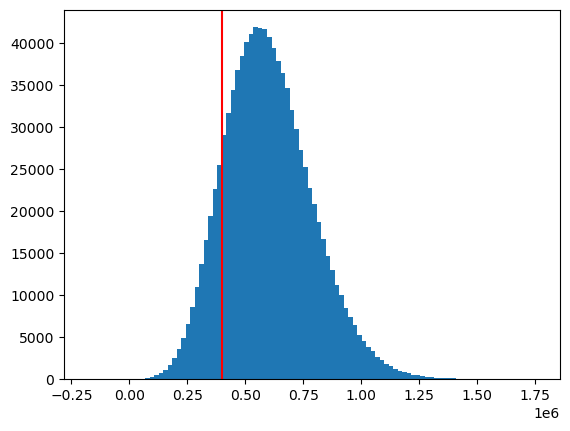

In [7]:
# Đặt ngưỡng lợi nhuận
threshold = 400000

# Vẽ histogram của tổng lợi nhuận
plt.hist(data.total_savings, bins = 100)

# Vẽ đường thẳng lợi nhuận
plt.axvline(x = threshold, c = "r")
plt.show()

Tính toán xác suất tiết kiệm hàng năm nhỏ hơn chi phí của chiếc máy (xác suất thua lỗ).

In [8]:
data[data["total_savings"] < threshold].count()["total_savings"] / 1000000

0.14043

#### BÀI TẬP THÊM

##### Bài 1:

In [9]:
import numpy as np
from numpy import exp, sqrt, sin, pi, log, cos
from numpy.random import rand

b = 1000
H = lambda x1, x2: (2*b)**2 * exp(-sqrt(x1**2+x2**2)/4)*(sin(2*sqrt(x1**2+x2**2))+1)*(x1**2+x2**2 < b**2)
f = 1/((2*b)**2)
N = 10**6
X1 = -b + 2*b*rand(N,1)
X2 = -b + 2*b*rand(N,1)
Z = H(X1,X2)
estCMC = np.mean(Z).item()
RECMC = np.std(Z)/estCMC/sqrt(N).item()
print('CI = ({:3.3f},{:3.3f}), RE = {:3.3f}'.format(estCMC*(1-1.96*RECMC), estCMC*(1+1.96*RECMC), RECMC))

CI = (84.693,139.783), RE = 0.125


##### Bài 2

In [12]:
#Tạo mẫu bootstrap
bootstrap_distribution = list()
for _ in range(100):
    bootstrap_sample = np.random.normal(50, 2, 100)

    #Tính mức trung bình của mẫu bootstrap
    bootstrap_means = bootstrap_sample.mean(axis = 0)
    bootstrap_distribution.append(bootstrap_means)
#Ước tính mức trung bình
estimated_mean = np.array(bootstrap_distribution).mean()
print(f'Ước lượng của bootstrap là: {estimated_mean}') 

Ước lượng của bootstrap là: 49.99853037011589
